# Лабораторная работа 2.3: Метод возмущений (базовый)

## Формулировка задачи

Решение нелинейного уравнения $f(x; \varepsilon) = x^3 + \varepsilon x - 1 = 0$ методом возмущений для малого параметра $\varepsilon \ll 1$.

## Метод возмущений

Решение ищется в виде ряда по степеням малого параметра:
$$x(\varepsilon) = x^{(0)} + \varepsilon x^{(1)} + \varepsilon^2 x^{(2)} + \varepsilon^3 x^{(3)} + \ldots$$

**Асимптотическое разложение:**
- $x^{(0)} = 1$ (нулевое приближение)
- $x^{(1)} = -\frac{1}{3}$ (первое приближение)
- $x^{(2)} = 0$ (второе приближение)
- $x^{(3)} = \frac{1}{81}$ (третье приближение)

## Методы сравнения

1. **Метод возмущений:** $x(\varepsilon) \approx x^{(0)} + \varepsilon x^{(1)} + \varepsilon^3 x^{(3)}$
2. **Метод бисекции:** численное решение через деление отрезка пополам
3. **Метод Ньютона:** итерационный метод с использованием производной
4. **SciPy fsolve:** стандартный численный метод

## Анализ точности

Исследуется зависимость ошибки асимптотического разложения от величины параметра $\varepsilon$ в логарифмическом масштабе.


In [1]:
# 2.3 Метод возмущений
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# f(x; eps) и df(x; eps)
# x(0)=1; x(1)=1 - eps/3; x(3)=1 - eps/3 + eps^3/81

def f(x, eps):
    return x**3 + eps*x - 1.0

def df(x, eps):
    return 3.0*x**2 + eps

def x_asymp(eps, order=3):
    x0 = 1.0
    if order <= 0:
        return x0
    x1 = x0 + eps*(-1.0/3.0)
    if order == 1:
        return x1
    x2 = x1
    if order == 2:
        return x2
    x3 = x2 + eps**3*(1.0/81.0)
    return x3

def bisect_scalar(func, a, b, tol=1e-12, max_iter=200):
    fa, fb = func(a), func(b)
    left, right = a, b
    for _ in range(max_iter):
        mid = 0.5*(left + right)
        fm = func(mid)
        if abs(fm) < tol or abs(right - left) < tol:
            return mid
        if fa*fm < 0:
            right, fb = mid, fm
        else:
            left, fa = mid, fm
    return 0.5*(left + right)

def newton_scalar(func, dfunc, x0, tol=1e-12, max_iter=100):
    x = float(x0)
    for _ in range(max_iter):
        fx = func(x)
        dfx = dfunc(x)
        if abs(dfx) < 1e-14:
            break
        x_new = x - fx/dfx
        if abs(x_new - x) < tol:
            x = x_new
            break
        x = x_new
    return x

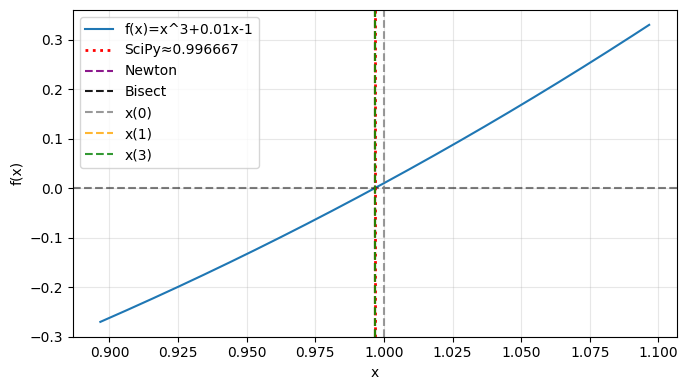

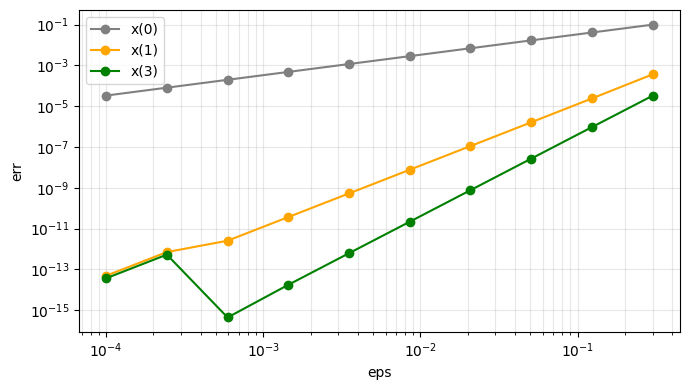

,x0,x1,x3,scipy,err(x0),err(x1),err(x3)
eps,,,,,,,
0.000100,1.0,0.999967,0.999967,0.999967,0.000033,4.940492e-14,3.708145e-14
0.000243,1.0,0.999919,0.999919,0.999919,0.000081,7.123191e-13,5.342393e-13
0.000593,1.0,0.999802,0.999802,0.999802,0.000198,2.568501e-12,4.440892e-16
0.001442,1.0,0.999519,0.999519,0.999519,0.000481,3.705480e-11,1.776357e-14
0.003511,1.0,0.998830,0.998830,0.998830,0.001170,5.347938e-10,6.272760e-13
0.008545,1.0,0.997152,0.997152,0.997152,0.002848,7.725959e-09,2.194445e-11
0.020801,1.0,0.993066,0.993066,0.993066,0.006934,1.118815e-07,7.703517e-10
0.050632,1.0,0.983123,0.983124,0.983124,0.016876,1.629535e-06,2.703560e-08
0.123246,1.0,0.958918,0.958941,0.958942,0.041058,2.405929e-05,9.472464e-07


In [2]:
eps = 1e-2
x0 = x_asymp(eps, 0)
x1 = x_asymp(eps, 1)
x3 = x_asymp(eps, 3)

x_bis = bisect_scalar(lambda x: f(x, eps), 0.0, 2.0)
x_new = newton_scalar(lambda x: f(x, eps), lambda x: df(x, eps), 1.0)
x_sci = fsolve(lambda x: f(x, eps), 1.0)[0]

X = np.linspace(x_sci - 0.1, x_sci + 0.1, 600)
Y = [f(x, eps) for x in X]

plt.figure(figsize=(7, 4))
plt.plot(X, Y, color='tab:blue', label=f"f(x)=x^3+{eps}x-1")
plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x_sci, color='red', linestyle=':', linewidth=2, label=f"SciPy≈{x_sci:.6f}")
plt.axvline(x_new, color='purple', linestyle='--', alpha=0.9, label='Newton')
plt.axvline(x_bis, color='black', linestyle='--', alpha=0.9, label='Bisect')
plt.axvline(x0, color='gray', linestyle='--', alpha=0.8, label='x(0)')
plt.axvline(x1, color='orange', linestyle='--', alpha=0.8, label='x(1)')
plt.axvline(x3, color='green', linestyle='--', alpha=0.8, label='x(3)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

EPS = np.geomspace(1e-4, 3e-1, 10)

err0, err1, err3 = [], [], []
for e in EPS:
    xsci = fsolve(lambda x: f(x, e), 1.0)[0]
    err0.append(abs(x_asymp(e, 0) - xsci))
    err1.append(abs(x_asymp(e, 1) - xsci))
    err3.append(abs(x_asymp(e, 3) - xsci))

plt.figure(figsize=(7, 4))
plt.loglog(EPS, err0, 'o-', color='gray', label='x(0)')
plt.loglog(EPS, err1, 'o-', color='orange', label='x(1)')
plt.loglog(EPS, err3, 'o-', color='green', label='x(3)')
plt.xlabel('eps')
plt.ylabel('err')
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

rows = []
for e in EPS:
    x0 = x_asymp(e, 0)
    x1 = x_asymp(e, 1)
    x3 = x_asymp(e, 3)
    xs = fsolve(lambda x: f(x, e), 1.0)[0]

    rows.append({
        'x0': x0,
        'x1': x1,
        'x3': x3,
        'scipy': xs,
        'err(x0)': abs(x0 - xs),
        'err(x1)': abs(x1 - xs),
        'err(x3)': abs(x3 - xs),
    })

df = pd.DataFrame(rows, index=EPS)
df.index.name = 'eps'
df = df[['x0', 'x1', 'x3', 'scipy', 'err(x0)', 'err(x1)', 'err(x3)']]
display(df)

